# Book Recommendation system based on Different Categories of rating

## Importing The Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy

### Importing a data one by one

In [2]:
df0 = pd.read_csv('book1-100k.csv')
df1 = pd.read_csv('book100k-200k.csv')
df2 = pd.read_csv('book200k-300k.csv')
df3 = pd.read_csv('book300k-400k.csv')
df4 = pd.read_csv('book400k-500k.csv')
df5 = pd.read_csv('book500k-600k.csv')
df6 = pd.read_csv('book600k-700k.csv')
df7 = pd.read_csv('book700k-800k.csv')
df8 = pd.read_csv('book800k-900k.csv')
df9 = pd.read_csv('book900k-1000k.csv')
df10 = pd.read_csv('book1000k-1100k.csv')
df11 = pd.read_csv('book1100k-1200k.csv')
df12 = pd.read_csv('book1200k-1300k.csv')
df13 = pd.read_csv('book1300k-1400k.csv')
df14 = pd.read_csv('book1400k-1500k.csv')
df15 = pd.read_csv('book1500k-1600k.csv')
df16 = pd.read_csv('book1600k-1700k.csv')
df17 = pd.read_csv('book1700k-1800k.csv')
df18 = pd.read_csv('book1800k-1900k.csv')
df19 = pd.read_csv('book1900k-2000k.csv')
df20 = pd.read_csv('book2000k-3000k.csv')
df21 = pd.read_csv('book3000k-4000k.csv')
df22 = pd.read_csv('book4000k-5000k.csv')


- df0 to df17 column names are match while concanating there is no problem but after df17 problems were created get extra column are getting added that we don't need
- That's why we just taking columns till df0 to df17 and df18 to df22

In [3]:
df =pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17])
df18_22 = pd.concat([df18,df19,df20,df21,df22])
# dfcopy = df.copy()
# df18_22copy = df18_22.copy

In [4]:
df.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN


In [5]:
df18_22.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description
0,1800000,Last Word: Media Coverage of the Supreme Court...,Florian Sauvageau,0774812435,5.00,2005,12,6,University of British Columbia Press,5:1,4:0,3:0,2:0,1:0,total:1,0,NaN,272,Media coverage of the Supreme Court of Canada ...
1,1800010,Murder on a Mystery Tour,Marian Babson,0802756689,3.20,2000,5,13,Walker & Company,5:21,4:73,3:121,2:42,1:10,total:267,26,NaN,182,<i>They had explored every avenue and it seeme...
2,1800011,Reel Murder: A Mystery,Marian Babson,0816144923,3.56,1988,12,31,G. K. Hall & Company,5:14,4:35,3:25,2:9,1:3,total:86,0,NaN,292,NaN
3,1800012,Principles of Bloodstain Pattern Analysis: The...,Stuart H. James,0849320143,4.58,2005,5,26,CRC Press,5:12,4:6,3:1,2:0,1:0,total:19,2,NaN,576,Bloodstain evidence has become a deciding fact...
4,1800013,The Encyclopedia of Crime Scene Investigation,Michael Newton,0816068151,4.00,2007,10,1,Checkmark Books,5:3,4:2,3:3,2:0,1:0,total:8,0,NaN,334,Recent years have brought numerous development...


### As you see above Both have page number but Have different names
### it will Create Two columns instead of one to avoid this we need to rename as pagesNumber instead of PagesNumber

In [6]:
df18_22.rename({"PagesNumber":"pagesNumber"},inplace = True,axis=1)

### Here we Concatenate the two data set df and df18_22 and making one data set

In [7]:
df = pd.concat([df,df18_22])
dfcopy = df.copy()

In [8]:
df.shape

(1850310, 20)

In [9]:
df.nunique()

Id                       1850115
Name                     1636235
RatingDist1                 8735
pagesNumber                 3096
RatingDist4                29176
RatingDistTotal            43967
PublishMonth                  31
PublishDay                    31
Publisher                  79422
CountsOfReview              2832
PublishYear                  199
Language                     124
Authors                   675289
Rating                       338
RatingDist2                13172
RatingDist5                29664
ISBN                     1844192
RatingDist3                23784
Description              1083697
Count of text reviews        869
dtype: int64

- Id: There are 1,850,115 unique IDs in the dataset.
- Name: There are 1,636,235 unique book names in the dataset.
- RatingDist1: There are 8,735 unique values for the number of 1-star ratings a book received.
- pagesNumber: There are 3,096 unique values for the number of pages in each book.
- RatingDist4: There are 29,176 unique values for the number of 4-star ratings a book received.
- RatingDistTotal: There are 43,967 unique values for the total number of ratings a book received.
- PublishMonth: There are 31 unique values for the month a book was published.
- PublishDay: There are 31 unique values for the day a book was published.
- Publisher: There are 79,422 unique publishers in the dataset.
- CountsOfReview: There are 2,832 unique values for the number of reviews a book received.
- PublishYear: There are 199 unique values for the year a book was published.
- Language: There are 124 unique languages in the dataset.
- Authors: There are 675,289 unique authors in the dataset.
- Rating: There are 338 unique values for the ratings a book received.
- RatingDist2: There are 13,172 unique values for the number of 2-star ratings a book received.
- RatingDist5: There are 29,664 unique values for the number of 5-star ratings a book received.
- ISBN: There are 1,844,192 unique ISBNs in the dataset.
- RatingDist3: There are 23,784 unique values for the number of 3-star ratings a book received.
- Description: There are 1,083,697 unique book descriptions in the dataset.
- Count of text reviews: There are 869 unique values for the number of text reviews a book received.

### We have total 1850310 rows and 20 Columns
###### Checking The Na values

In [10]:
df.isna().sum()

Id                             0
Name                           0
RatingDist1                    0
pagesNumber                    0
RatingDist4                    0
RatingDistTotal                0
PublishMonth                   0
PublishDay                     0
Publisher                  17826
CountsOfReview                 0
PublishYear                    0
Language                 1598488
Authors                        0
Rating                         0
RatingDist2                    0
RatingDist5                    0
ISBN                        5923
RatingDist3                    0
Description               679122
Count of text reviews    1440613
dtype: int64

- Id: There are no missing values in this column.
- Name: There are no missing values in this column.
- RatingDist1: There are no missing values in this column.
- pagesNumber: There are no missing values in this column.
- RatingDist4: There are no missing values in this column.
- RatingDistTotal: There are no missing values in this column.
- PublishMonth: There are no missing values in this column.
- PublishDay: There are no missing values in this column.
- Publisher: There are 17826 missing values in this column.
- CountsOfReview: There are no missing values in this column.
- PublishYear: There are no missing values in this column.
- Language: There are 1598488 missing values in this column.
- Authors: There are no missing values in this column.
- Rating: There are no missing values in this column.
- RatingDist2: There are no missing values in this column.
- RatingDist5: There are no missing values in this column.
- ISBN: There are 5923 missing values in this column.
- RatingDist3: There are no missing values in this column.
- Description: There are 679122 missing values in this column.
- Count of text reviews: There are 1440613 missing values in this column.

In [12]:
((df.isna()).sum() * 100 / df.index.size).round(2)

Id                        0.00
Name                      0.00
RatingDist1               0.00
pagesNumber               0.00
RatingDist4               0.00
RatingDistTotal           0.00
PublishMonth              0.00
PublishDay                0.00
Publisher                 0.96
CountsOfReview            0.00
PublishYear               0.00
Language                 86.39
Authors                   0.00
Rating                    0.00
RatingDist2               0.00
RatingDist5               0.00
ISBN                      0.32
RatingDist3               0.00
Description              36.70
Count of text reviews    77.86
dtype: float64

In [13]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Id                        0.00
Name                      0.00
RatingDist1               0.00
pagesNumber               0.00
RatingDist4               0.00
RatingDistTotal           0.00
PublishMonth              0.00
PublishDay                0.00
Publisher                 0.96
CountsOfReview            0.00
PublishYear               0.00
Language                 86.39
Authors                   0.00
Rating                    0.00
RatingDist2               0.00
RatingDist5               0.00
ISBN                      0.32
RatingDist3               0.00
Description              36.70
Count of text reviews    77.86
dtype: float64

##### From above we Conclude that 
 - Language have 86.39% is missing data
 - Count of text have 77.86% is missing data 
 - Publisher have 0.96% missing data
 - ISBN have 0.32% missing data
 - Description have 36.70% Missing Data 
 - we will Drop Language and Count of text reviews

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 280255
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   RatingDist1            object 
 3   pagesNumber            int64  
 4   RatingDist4            object 
 5   RatingDistTotal        object 
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   CountsOfReview         int64  
 10  PublishYear            int64  
 11  Language               object 
 12  Authors                object 
 13  Rating                 float64
 14  RatingDist2            object 
 15  RatingDist5            object 
 16  ISBN                   object 
 17  RatingDist3            object 
 18  Description            object 
 19  Count of text reviews  float64
dtypes: float64(2), int64(6), object(12)
memory usage: 296.5+ MB


### from Above we see that 
 - RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5 is Object Type but should be In Int type

In [15]:
df.describe()

,Id,pagesNumber,PublishMonth,PublishDay,CountsOfReview,PublishYear,Rating,Count of text reviews
count,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,1.850310e+06,409697.000000
mean,2.111590e+06,2.765517e+02,7.700550e+00,7.987211e+00,1.158022e+01,1.997841e+03,2.894243e+00,7.172742
std,1.408184e+06,5.006019e+03,7.756940e+00,8.431777e+00,2.952674e+02,8.789461e+01,1.725019e+00,124.838833
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000
25%,8.273325e+05,1.440000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.993000e+03,2.000000e+00,0.000000
50%,2.017784e+06,2.390000e+02,6.000000e+00,5.000000e+00,0.000000e+00,2.000000e+03,3.680000e+00,1.000000
75%,3.200679e+06,3.380000e+02,1.100000e+01,1.100000e+01,2.000000e+00,2.005000e+03,4.000000e+00,3.000000
max,4.846451e+06,4.517845e+06,3.100000e+01,3.100000e+01,1.544470e+05,6.553500e+04,5.000000e+00,43652.000000


- we removing the Unwanted data from RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5 making Converting Data Object type to Int type

In [16]:
df['RatingDistTotal'] = df['RatingDistTotal'].apply(lambda rating: rating.split(':')[1]).astype('int')
df['RatingDist1'] = df['RatingDist1'].apply(lambda rating: rating.split(':')[1]).astype('int')
df['RatingDist2'] = df['RatingDist2'].apply(lambda rating: rating.split(':')[1]).astype('int')
df['RatingDist3'] = df['RatingDist3'].apply(lambda rating: rating.split(':')[1]).astype('int')
df['RatingDist4'] = df['RatingDist4'].apply(lambda rating: rating.split(':')[1]).astype('int')
df['RatingDist5'] = df['RatingDist5'].apply(lambda rating: rating.split(':')[1]).astype('int')

- converting the string format that includes the rating category 
to an integer format. This may be useful for 
- visualizinng data 
- making good interpretaion of data of books

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 280255
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   RatingDist1            int32  
 3   pagesNumber            int64  
 4   RatingDist4            int32  
 5   RatingDistTotal        int32  
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   CountsOfReview         int64  
 10  PublishYear            int64  
 11  Language               object 
 12  Authors                object 
 13  Rating                 float64
 14  RatingDist2            int32  
 15  RatingDist5            int32  
 16  ISBN                   object 
 17  RatingDist3            int32  
 18  Description            object 
 19  Count of text reviews  float64
dtypes: float64(2), int32(6), int64(6), object(6)
memory usage: 254.1+ MB


# Working on PublishDay,PublishMonth and PublishYear

In [18]:
df[["PublishDay","PublishMonth","PublishYear"]].describe()

,PublishDay,PublishMonth,PublishYear
count,1.850310e+06,1.850310e+06,1.850310e+06
mean,7.987211e+00,7.700550e+00,1.997841e+03
std,8.431777e+00,7.756940e+00,8.789461e+01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.993000e+03
50%,5.000000e+00,6.000000e+00,2.000000e+03
75%,1.100000e+01,1.100000e+01,2.005000e+03
max,3.100000e+01,3.100000e+01,6.553500e+04


- PublishDay column: The range of values for the day of the month when a book was published is between 1 and 31, with a mean of approximately 7.99 and a standard deviation of 8.43. The median is 5 and 75% of the data falls below 11.
- PublishMonth column: The range of values for the month when a book was published is also between 1 and 31, which is not realistic as there are only 12 months in a year. This suggests that there may be some incorrectness in the data. The mean is approximately 7.70 and the standard deviation is 7.76. The median is 6 and 75% of the data falls below 11.
- PublishYear column: The range of values for the year when a book was published is between 1 and 65535, which is also not realistic as books have not been published for that many years. This again suggests that there may be some incorrectness in the data. The mean is approximately 1997.84 and the standard deviation is 87.89. The median is 2000 and 75% of the data falls below 2005.
- Minimum day is 1 and Maximum day is 31 which is In Range
- Minimum Month is 1 and Maximum Month is 31 as we know there are only 12 months in year which is not possible


In [19]:
df['PublishYear'].unique()

array([ 2006,  2004,  2003,  2002,  2005,  1996,  2001,  2000,  1990,
        1993,  1997,  1991,  2012,  1994,  2007,  1982,  1986,  1999,
        1987,  1984,  1965,  1998,  1995,  1960,  2009,  1988,  1940,
        1964,  1975,  1957,  1970,  1962,  1966,  1989,  1976,  2011,
        1974,  1955,  1985,  1972,  1980,  1969,  2014,  1983,  1992,
        2008,  1963,  1978,  1971,  2010,  2013,  1973,  2019,  2018,
        2015,  1919,  1921,  1923,  1945,  1968,  1958,  1979,  1922,
        1961,  1977,  1929,  1924,  1981,  1954,  1912,  1950,  1959,
        2017,  2016,  1900,  1956,  1938,  1967,  1947,  1943,  1953,
        1952,  1948,  1935,  1928,  1949,  1913,  1925,  1937,  1914,
        1931,  1951,  1926,  2020,  3002,  1942,  1936,  1946,  1944,
        1933,  1930,  1934,  1941,   162,  1850,  1939,  1859,  1899,
        1916,  1927,  1905,  1920,  1892,  1880,  1932,  1898,  1623,
        1917,  1901,  1907,  1878,  1915,   200,   299,  1904,  1918,
        1911,  1874,

- Some of the values seem incorrect, such as '65535', '19769', '4979', '1384', '1','20016','3006','162' etc. These are likely errors or types in the data entry process, and should be deal with appropriately, such as by replacing with NaN values or removing the corresponding rows altogether.
- Here Many years are values are above 2022 which is not possible
- we will take only the year between 1950 and 2020

In [18]:
df = df[(df["PublishYear"].values >= 1960 ) & (df["PublishYear"].values <= 2020)]

- we will filters the DataFrame df to only include rows where the value in the "PublishYear" column is greater than or equal to 1960 and less than equal to 2020. This means that only books published between 1960 and 2020 (inclusive) will be included in the filtered DataFrame. The resulting DataFrame will have the same columns as the original DataFrame, but will only contain a subset of the original rows that satisfy the condition.

In [19]:
df.drop_duplicates(keep = 'first',inplace = True)

 -Here we dropped the duplicate values

## Working on Publisher
- Above we see that only 0.96% data is missing
- we will fill the with mode value

In [20]:
df[df["Publisher"].isnull()]

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews
27,38,The Lord of the Rings Box Set,5774,1223,126639,539513,19,9,NaN,19,2001,eng,J.R.R. Tolkien,4.50,11142,352247,0618153977,43711,NaN,NaN
480,721,Incredible Chord Finder: Easy-to-Use Guide to ...,0,104,6,12,1,12,NaN,1,1986,NaN,Songbook,3.67,0,1,0881885940,5,NaN,NaN
486,728,Mel Bays Guitar Chords,0,48,2,20,1,1,NaN,2,1993,NaN,Mel Bay,4.50,0,14,0871660903,4,NaN,NaN
525,792,London: City Guide (Lonely Planet City Guide),6,466,315,718,1,1,NaN,4,2006,eng,Lonely Planet,4.03,17,228,1740598318,152,NaN,NaN
527,794,London,6,400,315,718,1,3,NaN,0,2002,eng,Lonely Planet,4.03,17,228,186450353X,152,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279642,4844157,Translating a Translation: The LXX and its Mod...,0,317,0,0,6,16,NaN,0,2008,NaN,Hans Ausloos,0.00,0,0,9042920386,0,NaN,NaN
279678,4844281,Colours And Shapes (First Steps With Ladybird),0,32,0,0,5,4,NaN,0,2000,NaN,Lesley Clark,0.00,0,0,0721422764,0,NaN,NaN
279748,4844536,Quicknotes Commentary Vol. 8 Matthew Mark (Bib...,0,224,0,2,11,1,NaN,0,2007,NaN,Stephen Leston,4.00,0,1,1597897744,1,<div>Here's a commentary for the everyday Chri...,NaN
280111,4845944,The New American Bible [Student Text Edition],71,1536,312,2453,9,1,NaN,1,1987,eng,Anonymous,4.52,71,1813,0840712898,186,Proven paperback is suitable for high school a...,NaN


-  Here 17749 rows in publisher which have nan values 

In [21]:
from statistics import mode
df["Publisher"].fillna(df["Publisher"].mode().iloc[0],inplace = True )

- filling mode values in publisher inplace of nan values

In [22]:
df["Publisher"].value_counts().head(10)

Routledge                                                     55324
Springer                                                      35778
Oxford University Press, USA                                  26909
Cambridge University Press                                    25859
Wiley                                                         12131
CRC Press                                                     11809
Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften    11447
Prentice Hall                                                 11043
iUniverse                                                      9923
John Wiley & Sons                                              8486
Name: Publisher, dtype: int64

In [23]:
df.shape

(1844567, 20)

In [24]:
df.nunique()

Id                       1844484
Name                     1631720
RatingDist1                 8693
pagesNumber                 3093
RatingDist4                29044
RatingDistTotal            43776
PublishMonth                  31
PublishDay                    31
Publisher                  79188
CountsOfReview              2829
PublishYear                   61
Language                     123
Authors                   674093
Rating                       338
RatingDist2                13121
RatingDist5                29523
ISBN                     1838678
RatingDist3                23687
Description              1081376
Count of text reviews        869
dtype: int64

In [25]:
df[["pagesNumber"]].describe()

,pagesNumber
count,1.844567e+06
mean,2.765010e+02
std,5.013790e+03
min,0.000000e+00
25%,1.440000e+02
50%,2.380000e+02
75%,3.380000e+02
max,4.517845e+06


- Minimum number of pages is 0 
- Maximum number of Pages is 4.517845e+06
- I assume that minimum number pages is 20 Boooks like short stories type book
- Maximum number of Pages is 5000 which books like wikipedia 
- we will we take only those pages in between 20 and 5000

In [26]:
df = df[(df["pagesNumber"].values > 50 ) & (df["pagesNumber"].values < 5000)]

In [27]:
df[["pagesNumber"]].describe()

,pagesNumber
count,1.678763e+06
mean,2.915580e+02
std,2.046825e+02
min,5.100000e+01
25%,1.740000e+02
50%,2.540000e+02
75%,3.520000e+02
max,4.992000e+03


- Here Minimum number of pages is 51 and maximum number of pages is 4992

In [28]:
df.rename({"RatingDistTotal":"TotalRating","RatingDist5":"5_Starrating","RatingDist4":"4_Starrating","RatingDist3":"3_Starrating","RatingDist2":"2_Starrating","RatingDist1":"1_Starrating","Rating":"Avg_Rating","Name":"Book","pagesNumber":"NumberOfPages"},inplace = True,axis = 1)

In [29]:
df.isna().sum()

Id                             0
Book                           0
1_Starrating                   0
NumberOfPages                  0
4_Starrating                   0
TotalRating                    0
PublishMonth                   0
PublishDay                     0
Publisher                      0
CountsOfReview                 0
PublishYear                    0
Language                 1449225
Authors                        0
Avg_Rating                     0
2_Starrating                   0
5_Starrating                   0
ISBN                        5360
3_Starrating                   0
Description               617904
Count of text reviews    1307271
dtype: int64

- dropping Language,ISBN,Description and Count of text reviews
- And arranging in required pattern 

In [30]:
df = df[["Id","Book","Authors","Publisher","PublishYear","NumberOfPages","1_Starrating","2_Starrating","3_Starrating","4_Starrating","5_Starrating","TotalRating","Avg_Rating"]]

In [31]:
df.isna().sum()

Id               0
Book             0
Authors          0
Publisher        0
PublishYear      0
NumberOfPages    0
1_Starrating     0
2_Starrating     0
3_Starrating     0
4_Starrating     0
5_Starrating     0
TotalRating      0
Avg_Rating       0
dtype: int64

In [33]:
df.drop_duplicates(keep='first',inplace=True)

In [34]:
df.shape

(1678763, 13)

- Here we Drop the Duplicate books the reduced total 1678763 books are unique

### 1.Top 10 Most Rated Book

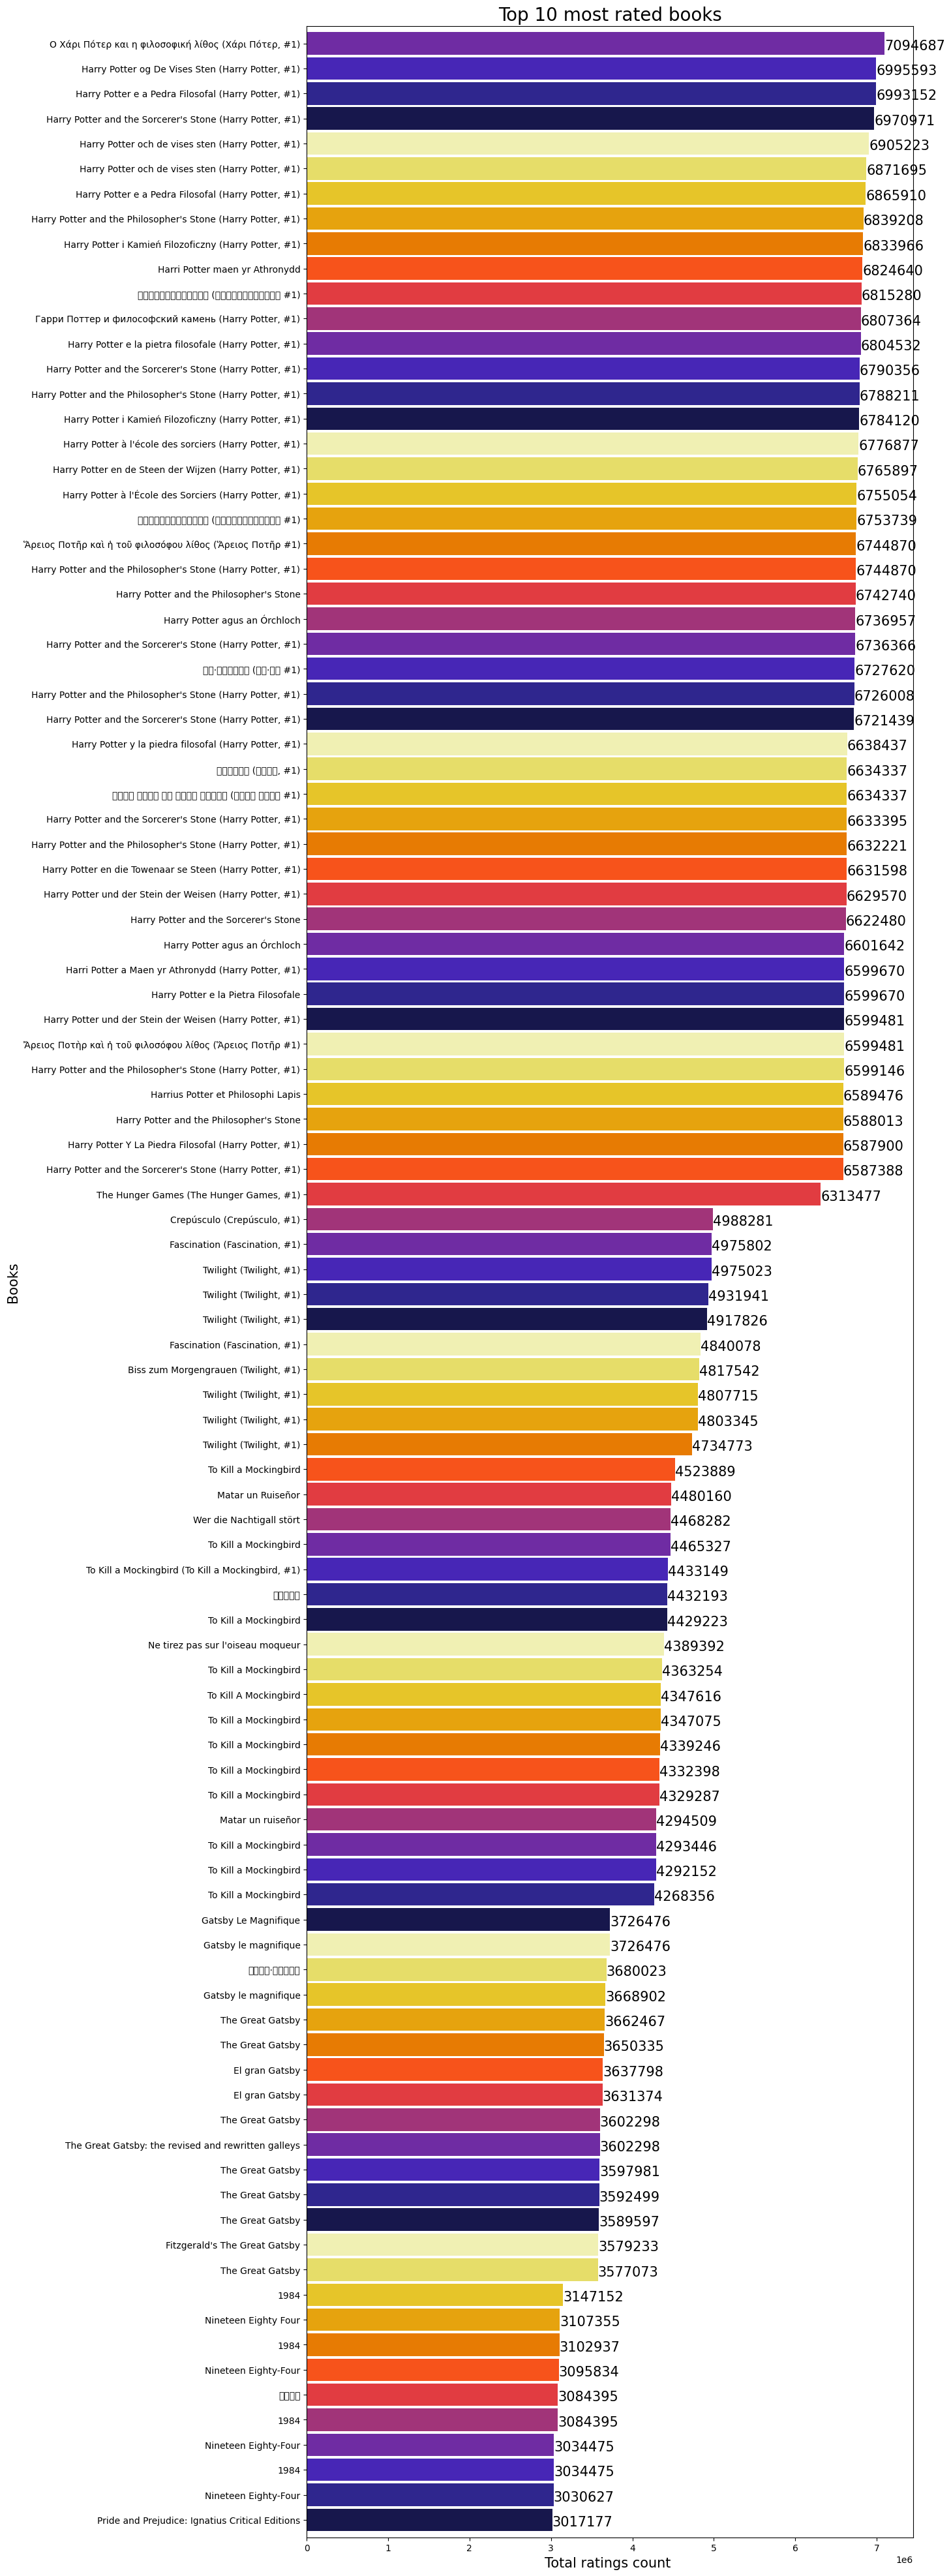

In [35]:
most_rated = df.sort_values('TotalRating',ascending=False).head(100).set_index('Book')
# plt.subplots(figsize=(12,8))
plt.rcParams['figure.figsize'] = (12, 50)
ax = most_rated['TotalRating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

<AxesSubplot:xlabel='Count', ylabel='Authors'>

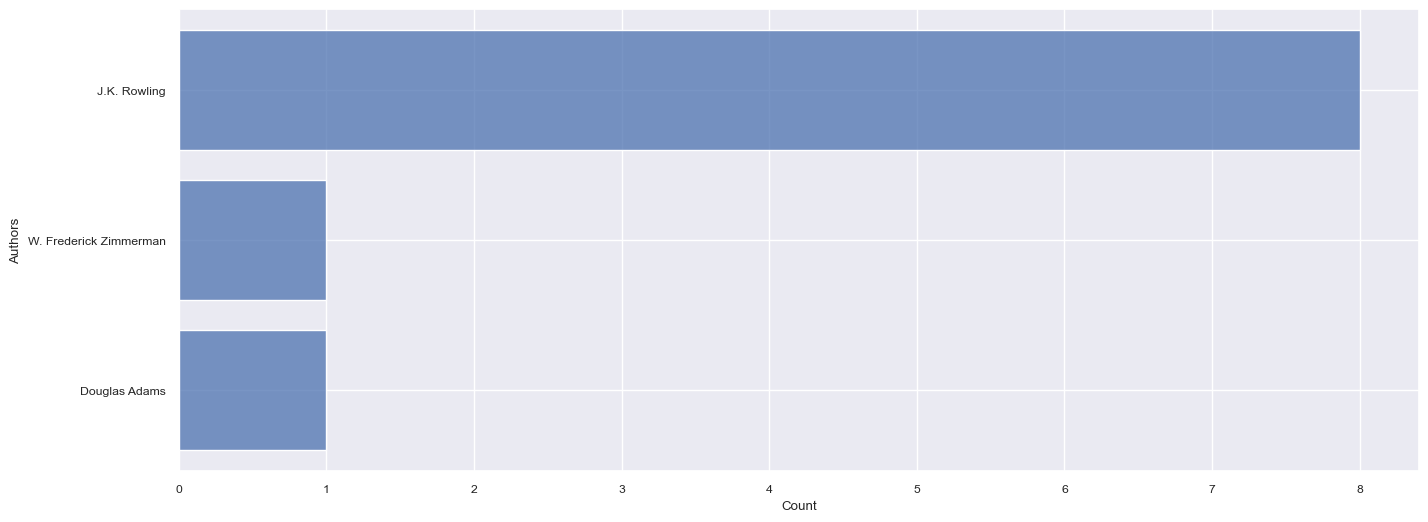

In [53]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.histplot(data=df,y=df["Authors"].head(10),shrink=.8)

In [37]:
df.to_csv("Cleandata.csv",index = False)
# pd.to_csv('C:/Path to save edited file.csv', index_col = False)

###  3.Which year were the biggest number of books written?

Text(0, 0.5, 'Number of books')

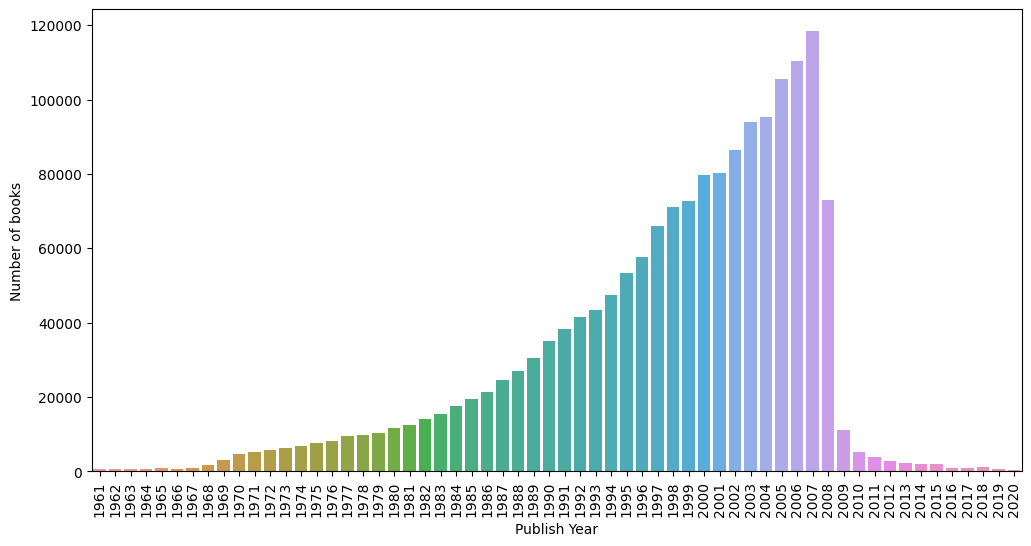

In [38]:
plt.figure(figsize = (12,6))
books_years = sns.barplot(y = df.groupby(['PublishYear'])['Book'].count().tail(60), x = df.groupby(['PublishYear'])['Book'].count().tail(60).index)
books_years.set_xticklabels(books_years.get_xticklabels(), rotation=90)
books_years.set_xlabel('Publish Year')
books_years.set_ylabel('Number of books')

- In 2007 Highest no of books were written 

### 4. Which book is the most popular?

In [39]:
# Total number of rates 
df[df['TotalRating'] == df['TotalRating'].max()]

,Id,Book,Authors,Publisher,PublishYear,NumberOfPages,1_Starrating,2_Starrating,3_Starrating,4_Starrating,5_Starrating,TotalRating,Avg_Rating
196492,4593339,Ο Χάρι Πότερ και η φιλοσοφική λίθος (Χάρι Πότε...,J.K. Rowling,Εκδόσεις Ψυχογιός,1998,360,119534,140565,603633,1621963,4608992,7094687,4.47


In [40]:
# Maximum number of 5 star rating
df[df['5_Starrating'] == df['5_Starrating'].max()]

,Id,Book,Authors,Publisher,PublishYear,NumberOfPages,1_Starrating,2_Starrating,3_Starrating,4_Starrating,5_Starrating,TotalRating,Avg_Rating
196492,4593339,Ο Χάρι Πότερ και η φιλοσοφική λίθος (Χάρι Πότε...,J.K. Rowling,Εκδόσεις Ψυχογιός,1998,360,119534,140565,603633,1621963,4608992,7094687,4.47


In [41]:
# Here we take only those books which people are given 5 stars rating
df[df['5_Starrating'] == 5]

,Id,Book,Authors,Publisher,PublishYear,NumberOfPages,1_Starrating,2_Starrating,3_Starrating,4_Starrating,5_Starrating,TotalRating,Avg_Rating
33,54,Molly Hatchet - 5 of the Best,Molly Hatchet,Cherry Lane Music Company,2003,56,1,0,0,0,5,6,4.33
87,131,The Power of One: The Solo Play for Playwright...,Louis E. Catron,Heinemann Drama,2000,240,1,2,3,4,5,15,3.67
95,140,eBay Business All-in-One Desk Reference for Du...,Marsha Collier,Wiley,2005,864,1,1,2,9,5,18,3.89
138,226,Comedy after Postmodernism: Rereading Comedy f...,Kirby Olson,Texas Tech University Press,2001,184,1,0,1,0,5,7,4.14
163,257,Haunted Places in America: A Guide to Spooked ...,Charles A. Coulombe,Lyons Press,2004,288,1,6,1,6,5,19,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279893,4845035,Probabilistic Methods Of Signal And System Ana...,George R. Cooper,"Oxford University Press, USA",1995,408,1,1,1,3,5,11,3.91
279999,4845508,Global New Deal: Economic and Social Human Rig...,William F. Felice,Rowman & Littlefield Publishers,2002,296,0,1,1,1,5,8,4.25
280125,4845996,Maxillofacial Surgery: 2-Volume Set,Peter Ward Booth,Churchill Livingstone,1999,1686,2,0,2,2,5,11,3.73
280187,4846214,A Different Face: The Life of Mary Wollstonecraft,Emily W. Sunstein,Little Brown and Company,1975,383,0,1,2,2,5,10,4.10


In [42]:
df[(df['Avg_Rating'] == 5)]

,Id,Book,Authors,Publisher,PublishYear,NumberOfPages,1_Starrating,2_Starrating,3_Starrating,4_Starrating,5_Starrating,TotalRating,Avg_Rating
230,380,A Colorful Symphony: Full Score,Robert Xavier Rodríguez,"G. Schirmer, Inc.",1997,68,0,0,0,0,1,1,5.0
238,392,"Bullets, Badges, and Bullshit",Phil T. O'Brien,PublishAmerica,2006,444,0,0,0,0,2,2,5.0
276,438,"New York Trilogy: New York Underground, Trappe...",Paul Hallasy,iUniverse,2000,156,0,0,0,0,2,2,5.0
502,754,Guitar Picture Chords in Color,Ed Lozano,Music Sales,2001,56,0,0,0,0,3,3,5.0
554,837,Angelfish,Dan Harrington,Lulu.com,2006,212,0,0,0,0,1,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280168,4846160,Straight And Devious Pathways From Childhood T...,Lee N. Robins,Cambridge University Press,1992,411,0,0,0,0,1,1,5.0
280179,4846191,20th Century America,Time-Life Books,Time Life Medical,1999,128,0,0,0,0,1,1,5.0
280196,4846241,Counterstrain Approaches In Osteopathic Manipu...,Harry Friedman,Sfimms Press,2000,106,0,0,0,0,1,1,5.0
280217,4846302,Asking the Right Questions about Electronic Vo...,Richard Celeste,National Academies Press,2006,148,0,0,0,0,1,1,5.0


### Let's restrict the search. Maybe we should check books with at least 1000 reviews.

In [43]:
df[(df['Avg_Rating'] > 4.8) & (df['TotalRating'] > 1000)]

,Id,Book,Authors,Publisher,PublishYear,NumberOfPages,1_Starrating,2_Starrating,3_Starrating,4_Starrating,5_Starrating,TotalRating,Avg_Rating
14698,24812,The Complete Calvin and Hobbes,Bill Watterson,Andrews McMeel Publishing,2005,1456,131,167,770,3491,29520,34079,4.82


### The Complete Calvin and Hobbes this is only book which gives from above conditions

### 5. Which author is the most popular?

In [44]:
# Let's check authors with biggest number of rates (total number for all books)
df.groupby('Authors')['TotalRating'].sum().sort_values(ascending = False).head(10)

Authors
J.K. Rowling           712529784
William Shakespeare    266488874
J.R.R. Tolkien         229644335
Jane Austen            169592548
George Orwell          129097296
C.S. Lewis             122029037
Stephen King           104397342
Dan Brown               97762408
Harper Lee              78828954
Mark Twain              74375333
Name: TotalRating, dtype: int32

In [45]:
df.groupby('Authors')['5_Starrating'].sum().sort_values(ascending = False).head(1)

Authors
J.K. Rowling    464531734
Name: 5_Starrating, dtype: int32

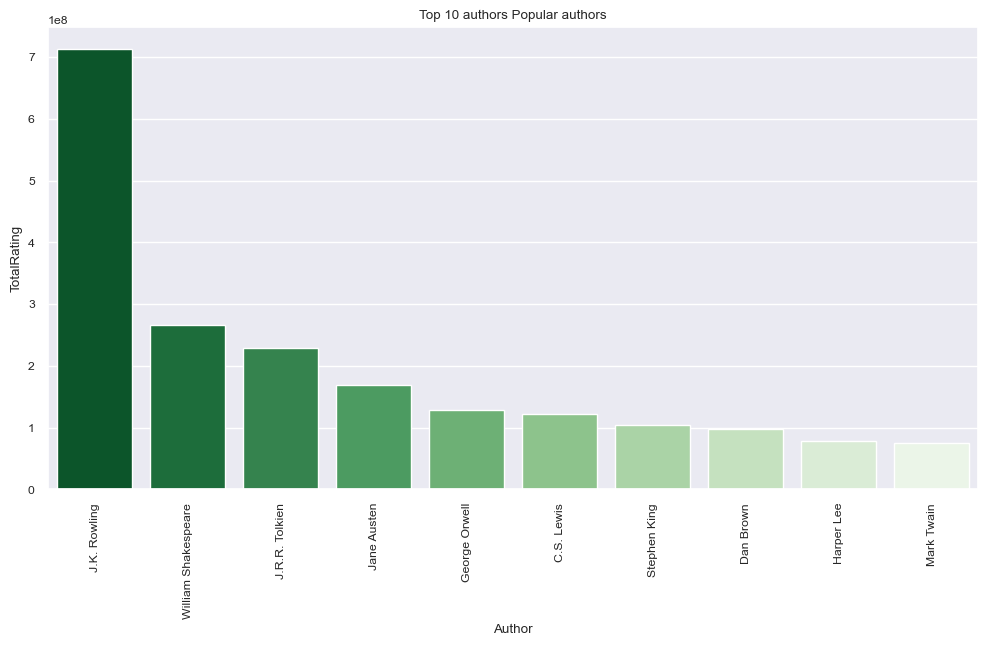

In [85]:
plt.rcParams['figure.figsize'] = (12, 6)
# sns.set(font_scale=0.8)
# assuming `df` is a Pandas DataFrame containing the relevant data
# perform the groupby operation and select the top 10 results
pop_authors = df.groupby('Authors')['TotalRating'].sum().sort_values(ascending = False).head(10)

# create a bar plot of the result
pal = sns.color_palette("Greens", len(pop_authors))
rank = pop_authors.argsort().argsort()
sns.barplot(x=pop_authors.index,y=pop_authors.values,palette=np.array(pal[::1])[rank])


# set the title and axis labels
plt.title('Top 10 authors Popular authors')
plt.xlabel('Author')
plt.ylabel('TotalRating')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# display the plot
plt.show()



# pal = sns.color_palette("Blues", len(top_authors))
# rank = top_authors.argsort().argsort()
# sns.barplot(x= top_authors.index,y=top_authors.values,palette=np.array(pal[::1])[rank])



### 6. Which author wrote the biggest number of books?

In [47]:
df.groupby('Authors')['Book'].count().sort_values(ascending = False).head(10)

Authors
Anonymous                           2690
Unknown                             1728
William Shakespeare                 1269
Francine Pascal                      924
Cram101 Textbook Reviews             876
Fodor's Travel Publications Inc.     845
National Research Council            836
Harold Bloom                         767
Agatha Christie                      691
Various                              633
Name: Book, dtype: int64

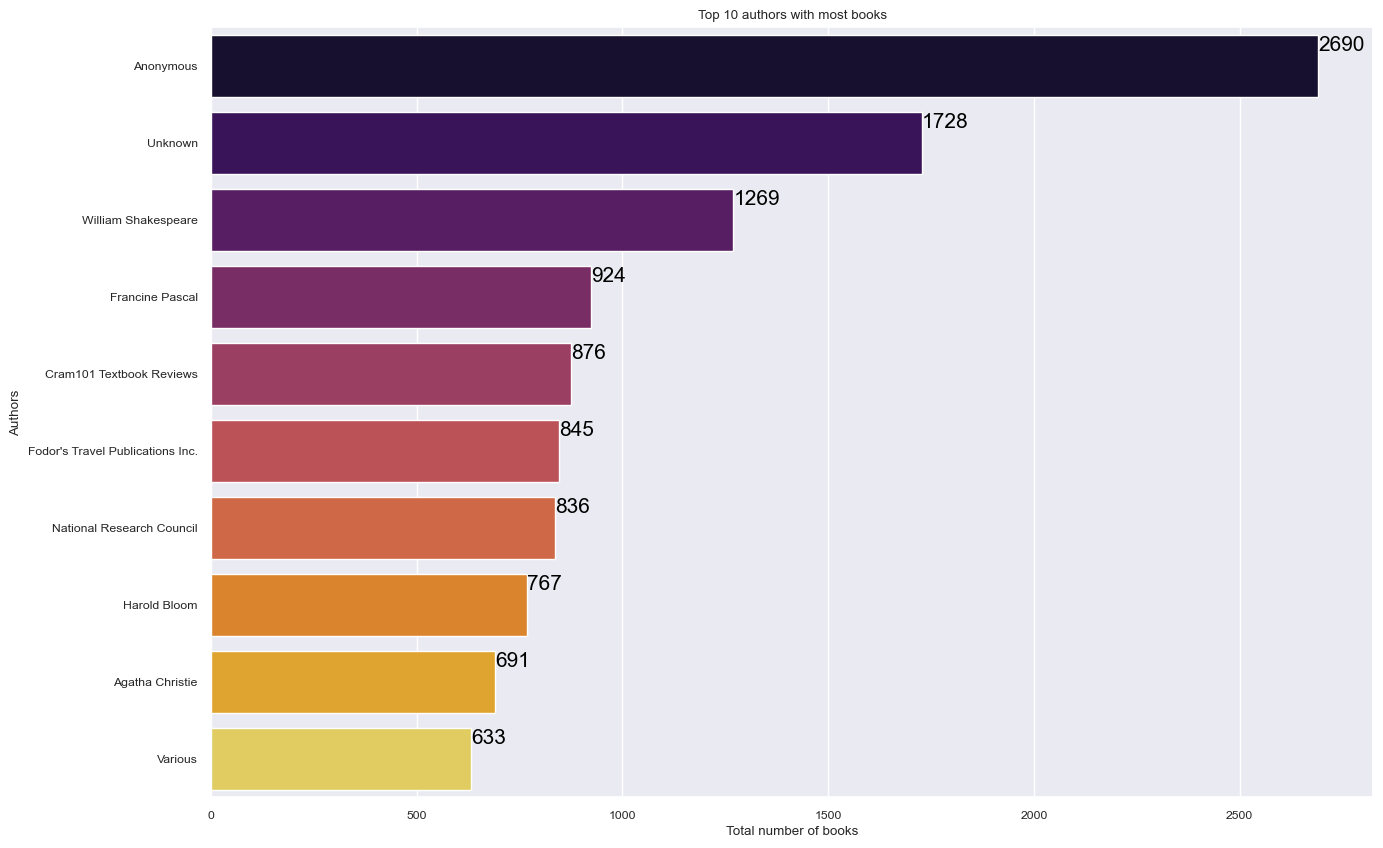

In [86]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.set(font_scale=0.8)
# assuming `df` is a Pandas DataFrame containing the relevant data
# perform the groupby operation and select the top 10 results
# top_authors = df.groupby('Authors')['Book'].count().sort_values(ascending=False).head(10)

# # create a bar plot of the result
# pal = sns.color_palette("Blues", len(top_authors))
# rank = top_authors.argsort().argsort()
# sns.barplot(x= top_authors.index,y=top_authors.values,palette=np.array(pal[::1])[rank])

# # set the title and axis labels
# plt.title('Top 10 authors by number of books')
# plt.xlabel('Author')
# plt.ylabel('Number of books')

# # rotate the x-axis labels for better readability
# plt.xticks(rotation=90)

# # display the plot
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('books.csv') # replace 'books.csv' with your file name

most_books = df.groupby('Authors')['Book'].count().reset_index().sort_values('Book', ascending=False).head(10).set_index('Authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x = most_books['Book'], y = most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()


Text(0.5, 0, 'Average rating')

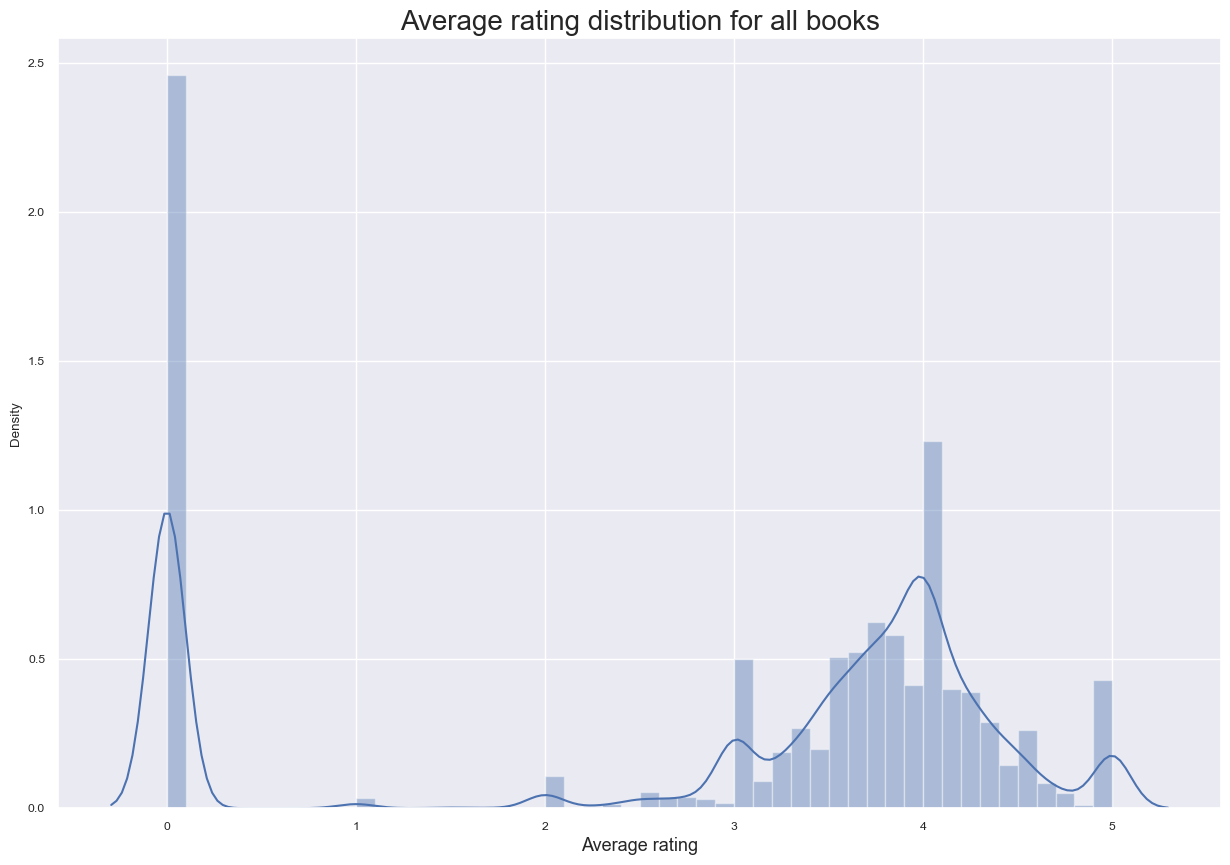

In [88]:
df.Avg_Rating = df.Avg_Rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['Avg_Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

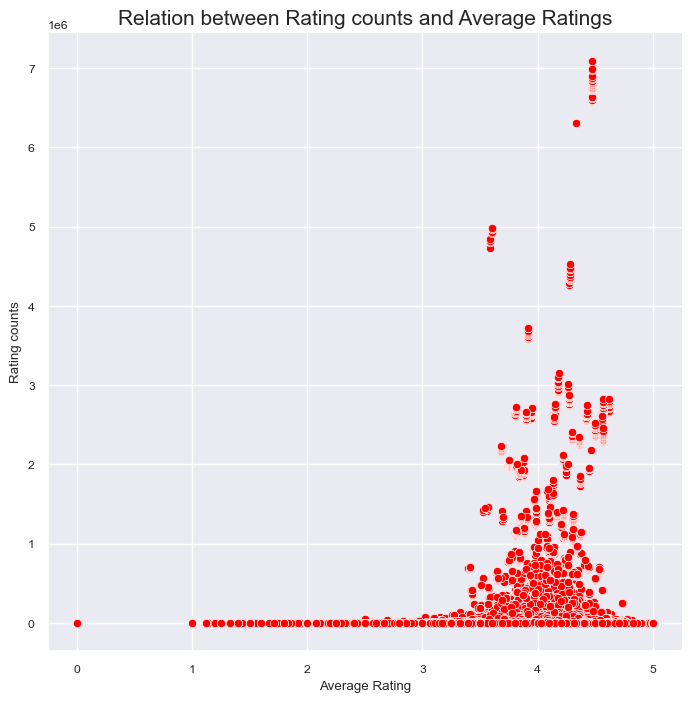

In [90]:
ax = sns.relplot(data=df, x="Avg_Rating", y="TotalRating", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Rating counts")

<Figure size 1500x1000 with 0 Axes>

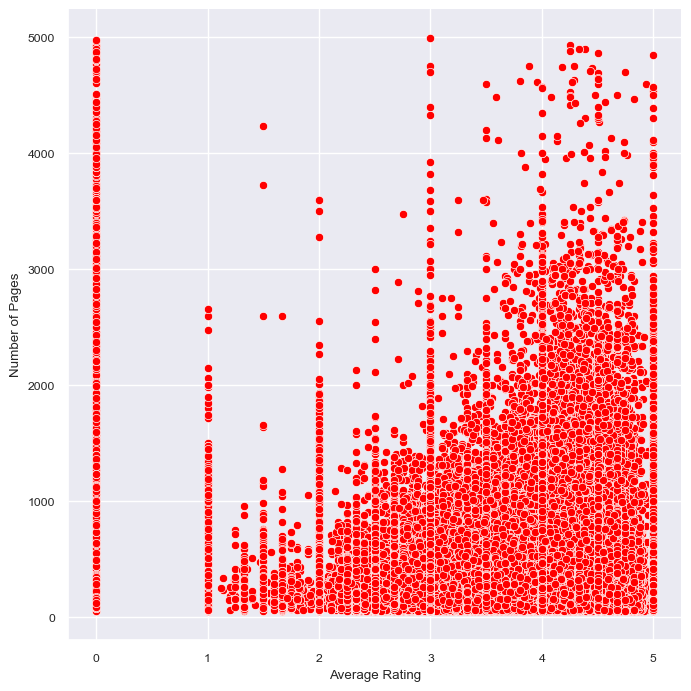

In [92]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="Avg_Rating", y="NumberOfPages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [9]:
import numpy,pandas,sklearn,seaborn,matplotlib
print(matplotlib.__version__)

3.5.3
